# Day 12: Advanced Matplotlib - Subplots

We are so back! So far, we've created single plots to visualize our data. However, you often need to compare multiple plots side-by-side. Matplotlib's subplot functionality allows you to place multiple plots within a single figure.

Today, we'll learn how to create complex figures to tell a richer story with our data. We will explore two main approaches:
1.  `plt.subplot()`: A simple way to create a grid of plots.
2.  `plt.subplots()`: A more powerful and flexible object-oriented approach (this is the preferred method).

As always, we start with our imports.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # We'll use this for a quick example later

---

## Part 1: The `plt.subplot()` Approach

The `plt.subplot()` command specifies a grid and selects which cell to draw on. The syntax is `plt.subplot(nrows, ncols, index)`.

- `nrows`: Total number of rows in the grid.
- `ncols`: Total number of columns in the grid.
- `index`: The plot number to activate, starting from 1 in the top-left corner and increasing to the right.

Let's create some data to plot.

In [ ]:
x = np.linspace(0, 2 * np.pi, 400)
y_sin = np.sin(x**2)
y_cos = np.cos(x**2)

**Exercise 1.1:** Create a figure that contains two plots arranged vertically (2 rows, 1 column). 
- The top plot (`index=1`) should show our `y_sin` data.
- The bottom plot (`index=2`) should show our `y_cos` data.

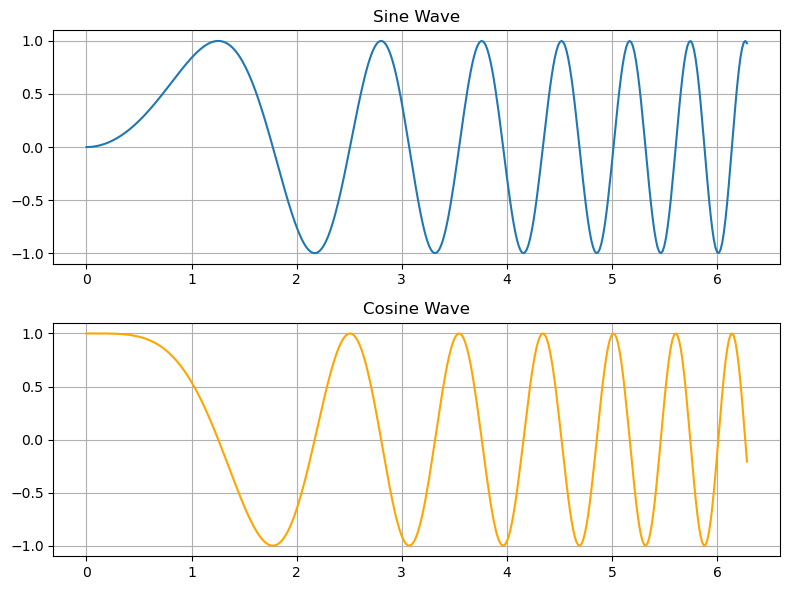

In [8]:
# Your code here
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.plot(x, y_sin)
plt.title("Sine Wave")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x, y_cos, color="orange")
plt.title("Cosine Wave")
plt.grid(True)

plt.tight_layout()
plt.show()

**Solution 1.1:**

In [ ]:
plt.figure(figsize=(8, 6))

# Activate the first subplot (top)
plt.subplot(2, 1, 1)
plt.plot(x, y_sin)
plt.title("Sine Wave")
plt.grid(True)

# Activate the second subplot (bottom)
plt.subplot(2, 1, 2)
plt.plot(x, y_cos, color="orange")
plt.title("Cosine Wave")
plt.grid(True)

# Add a layout manager to prevent titles/labels from overlapping
plt.tight_layout()

plt.show()

This method works, but it can be cumbersome as you have to keep track of the active subplot. Let's move on to a better way.

---

## Part 2: The `plt.subplots()` Approach (Object-Oriented)

The recommended way to create subplots is with `fig, ax = plt.subplots()`. This single function call creates a figure and a grid of subplots (called axes).

- `fig`: The entire figure object, which you can use to save the plot or add a main title.
- `ax`: An array of axes objects. You can access each subplot directly through this array (e.g., `ax[0]`, `ax[1, 0]`) and call plotting methods on it (e.g., `ax[0].plot()`, `ax[0].set_title()`).

This gives you much more explicit control over each plot.

**Exercise 2.1:** Create a 1x2 grid of plots (one row, two columns) using `plt.subplots()`.
- On the left axis (`ax[0]`), plot a histogram of 1000 random numbers drawn from a normal distribution (`np.random.randn(1000)`).
- On the right axis (`ax[1]`), create a scatter plot using two sets of 50 random numbers.
- Give each plot a descriptive title using the `ax.set_title()` method.

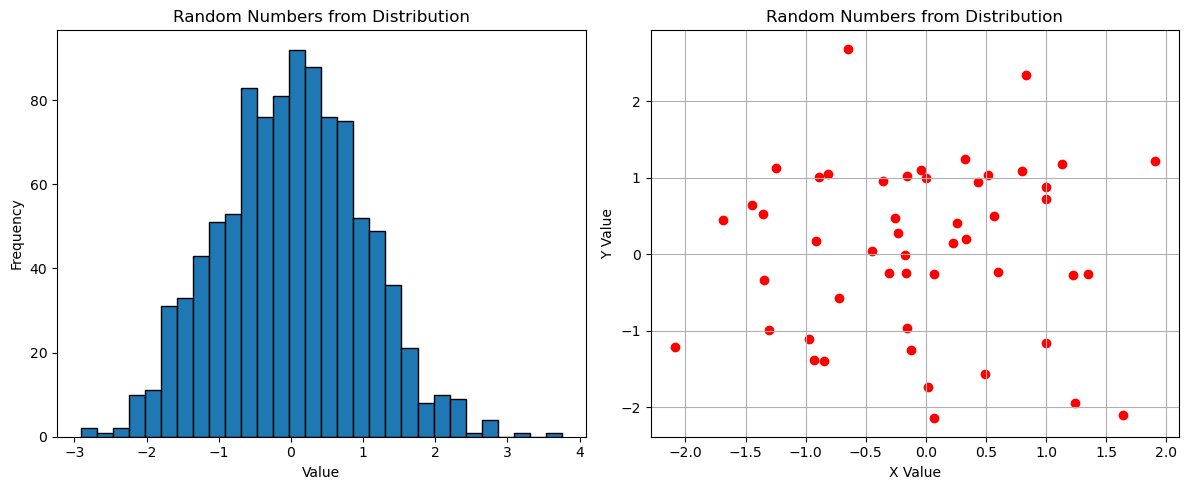

In [26]:
# Your code here
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
random_data_norm = np.random.randn(1000)
ax[0].hist(random_data_norm, bins=30, edgecolor="black")
ax[0].set_title("Random Numbers from Distribution")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Frequency")
# ax[0].grid(True)

ax[1].scatter(np.random.randn(50), np.random.randn(50), color="red")
ax[1].set_title("Random Numbers from Distribution")
ax[1].set_xlabel("X Value")
ax[1].set_ylabel("Y Value")
ax[1].grid(True)

plt.tight_layout()

**Solution 2.1:**

In [ ]:
# Create a figure and a 1x2 grid of axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot on the first (left) axis
random_data_norm = np.random.randn(1000)
ax[0].hist(random_data_norm, bins=30, color="skyblue", edgecolor="black")
ax[0].set_title("Histogram of Normal Data")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Frequency")
ax[0].grid(True)

# Plot on the second (right) axis
random_x = np.random.rand(50)
random_y = np.random.rand(50)
ax[1].scatter(random_x, random_y, color="red", alpha=0.6)
ax[1].set_title("Scatter Plot of Random Data")
ax[1].set_xlabel("X Value")
ax[1].set_ylabel("Y Value")
ax[1].grid(True)

plt.tight_layout()
plt.show()

---

## Part 3: Sharing Axes and Customization

A powerful feature of `plt.subplots()` is the ability to share axes. If plots share an x-axis or y-axis, you can link them using the `sharex` or `sharey` arguments. This is great for comparing data on the same scale.

We can also add a single, overarching title for the entire figure using `fig.suptitle()`.

**Exercise 3.1:** Create a 2x1 subplot grid where both plots share the x-axis.
- Use the arguments `nrows=2, ncols=1, sharex=True`.
- In the top plot (`ax[0]`), plot `x` vs `y_sin`.
- In the bottom plot (`ax[1]`), plot `x` vs `y_cos`.
- Add a main title to the *entire figure* called "Trigonometric Functions".
- Notice how the x-axis labels are automatically hidden on the top plot to reduce clutter!

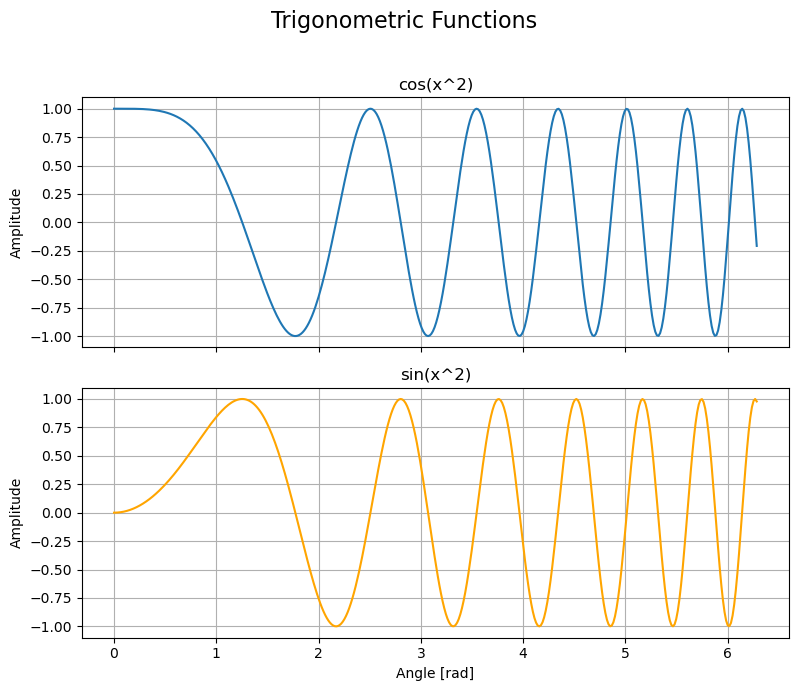

In [58]:
# Your code here
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 7), sharex=True)

fig.suptitle("Trigonometric Functions", fontsize=16)

ax[0].plot(x, y_cos)
ax[0].set_title("cos(x^2)")
ax[0].grid(True)
ax[0].set_ylabel("Amplitude")

ax[1].plot(x, y_sin, color="orange")
ax[1].set_title("sin(x^2)")
ax[1].grid(True)
ax[1].set_xlabel("Angle [rad]")
ax[1].set_ylabel("Amplitude")

plt.tight_layout(rect=[0, 0, 1, 0.96])

**Solution 3.1:**

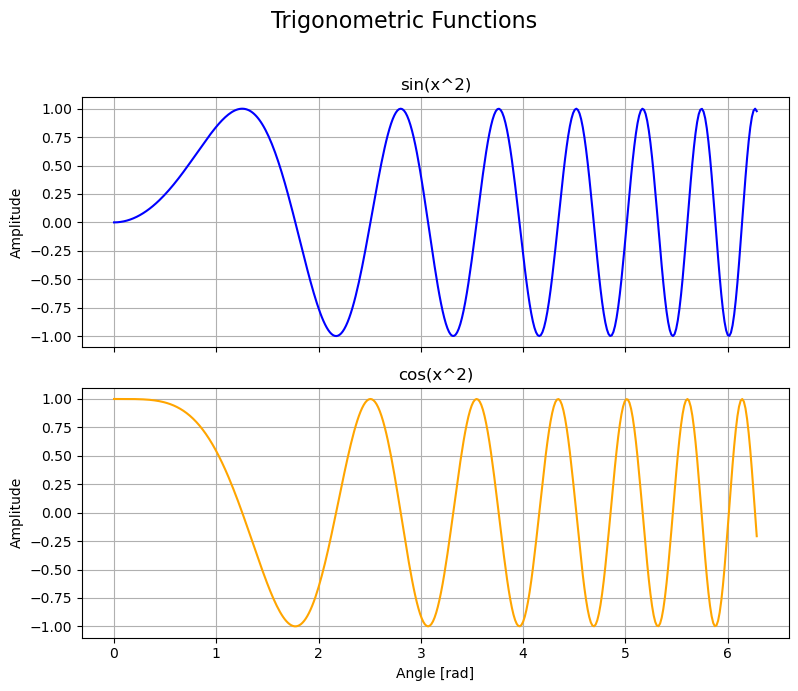

In [57]:
# When creating the subplots, set sharex=True
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 7), sharex=True)

# Add a main title for the whole figure
fig.suptitle("Trigonometric Functions", fontsize=16)

# Plot on the top axis
ax[0].plot(x, y_sin, color="blue")
ax[0].set_title("sin(x^2)")
ax[0].set_ylabel("Amplitude")
ax[0].grid(True)

# Plot on the bottom axis
ax[1].plot(x, y_cos, color="orange")
ax[1].set_title("cos(x^2)")
ax[1].set_xlabel("Angle [rad]")
ax[1].set_ylabel("Amplitude")
ax[1].grid(True)

# Adjust layout to make room for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

---

### Congratulations!

You now know how to create sophisticated, multi-panel figures. This is a crucial skill for data exploration, allowing you to compare different variables, datasets, and plot types in a single, coherent visualization.

Tomorrow, we'll switch gears back to Pandas and explore one of its most powerful features: time series analysis.